<a href="https://colab.research.google.com/github/gr-uzun/melbourne-housing/blob/main/melbourne_housing_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Required Libraries**

* Import the required libraries for the project to the Colab environment.
* Import NumPy, Pandas, Seaborn, and Matplotlib libraries for data analysis
* Import sklearn.model_selection, sklearn.metrics, sklearn.ensemble, sklearn.linear_model, sklearn_tree, sklearn.neighbour libraries and modules for modellling and evaluating performance of the model

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

**Gathering and Observing Data**

* Load the dataset to the project with the help of read_csv() and observe the first 5 columns

* Find the shape, number of columns and size of the dataset

* Show the information of the dataset, which contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [2]:
# Load the dataset to the project with the help of read_csv() and observe the first 5 columns

df = pd.read_csv("/content/dataset/Melbourne_housing_FULL.csv")
df_copy = df.copy()

df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
# Find the shape, number of columns and size of the dataset

print(f'Shape     : {df_copy.shape}\n'
      f'Size      : {df_copy.size}\n'
      f'Dimension : {df_copy.ndim}')

Shape     : (34857, 21)
Size      : 731997
Dimension : 2


In [4]:
"""
  Show the information of the dataset, which contains
  the number of columns, column labels, column data types, memory usage, range index,
  and the number of cells in each column (non-null values).
"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

**Exploratory Data Analysis**

* Examine the descriptive statistics of dataset
The values of some variables are given as objects. At the same time, we observe that there are also categorical values. This might give us trouble when examining the dataset. Therefore, in such cases, we need to define the variables categorically.

* Check for duplicate data. If there are duplicate data, clear them from the dataset.

* Clear outlier data in the dataset. When you examine the dataset, you will observe that the outlier data is generally in the "Landsize" and "Buildingarea" variables.

 * We expect you to use the z-score method when detecting outliers in the dataset!

* Find and remove the missing values on the dataset

* You can observe from the dataset that the missing values are in the bathroom and car variables. We expect the missing values in the dataset to be filled using the mode method. You can use the code below for this.

In [5]:
"""
  Examine the descriptive statistics of dataset The values of some variables are given as objects.
  At the same time, we observe that there are also categorical values.
  This might give us trouble when examining the dataset.
  Therefore, in such cases, we need to define the variables categorically.
"""
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [6]:
# Check for duplicate data.
df_copy.duplicated().sum()

1

In [7]:
df_copy.loc[df_copy.duplicated(keep=False), :]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [8]:
# If there are duplicate data, clear them from the dataset.
df_copy.drop_duplicates(inplace=True)

print(df_copy.duplicated().sum())

0


**Outlier Detection and Handling**
- Clear outlier data in the dataset.
- When you examine the dataset, you will observe that the outlier data is generally in the "Landsize" and "Buildingarea" variables.
- We expect you to use the z-score method when detecting outliers in the dataset!

In [9]:
def outlier_thresholds(df, col_name, low_quantile=0.25, up_quantile=0.75):
    Q1 = df[col_name].quantile(low_quantile)
    Q3 = df[col_name].quantile(up_quantile)
    IQR = Q3 - Q1
    low_limit = Q1 - 50 * IQR
    up_limit = Q3 + 50 * IQR
    return low_limit, up_limit

In [10]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [11]:
num_cols = df_copy.select_dtypes(exclude='object').columns
obj_cols = df_copy.select_dtypes(include='object').columns

In [12]:
print(f'Numerical Columns : {num_cols}', end='\n\n')
print(f'Object Columns : {obj_cols}')

Numerical Columns : Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

Object Columns : Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [13]:
# When you examine the dataset, you will observe that the outlier data is generally in the "Landsize" and "BuildingArea" variables.
for col in num_cols:
    print(col, check_outlier(df_copy, col))

Rooms False
Price False
Distance False
Postcode False
Bedroom2 False
Bathroom False
Car False
Landsize True
BuildingArea True
YearBuilt False
Lattitude False
Longtitude False
Propertycount False


In [14]:
def plot_outliers(data_frame,cols_outlier):
  plt.figure(figsize=(12, 10))

  i = 0
  for col in cols_outlier:

    i = i+1
    plt.subplot(2, 2, i)
    sns.boxplot(x=col, data=df_copy)
    plt.title(col + " Boxplot");

    i = i+1
    plt.subplot(2, 2, i)
    sns.violinplot(y=col, data=df_copy, inner="quartile", bw=0.2)
    plt.title(col + " Violin");

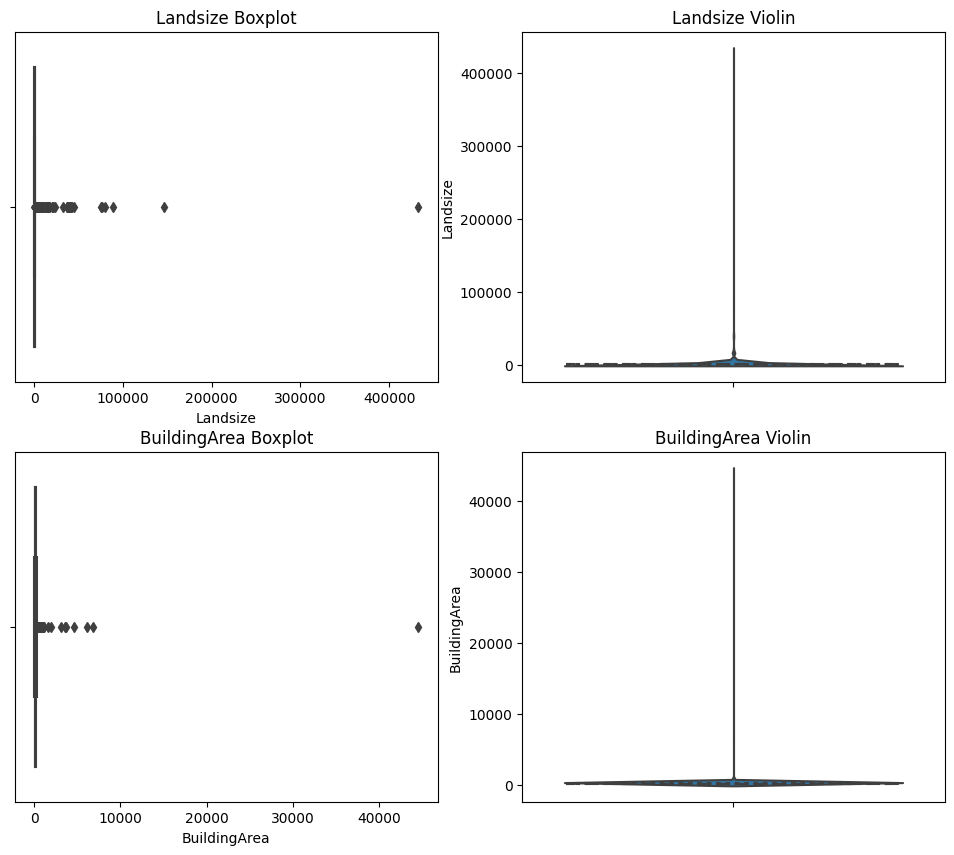

In [15]:
cols_outlier = ['Landsize','BuildingArea']
plot_outliers(df,cols_outlier)

In [16]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable , up_quantile=0.50)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [17]:
for col in cols_outlier:
    print(col, replace_with_thresholds(df_copy, col))

Landsize None
BuildingArea None


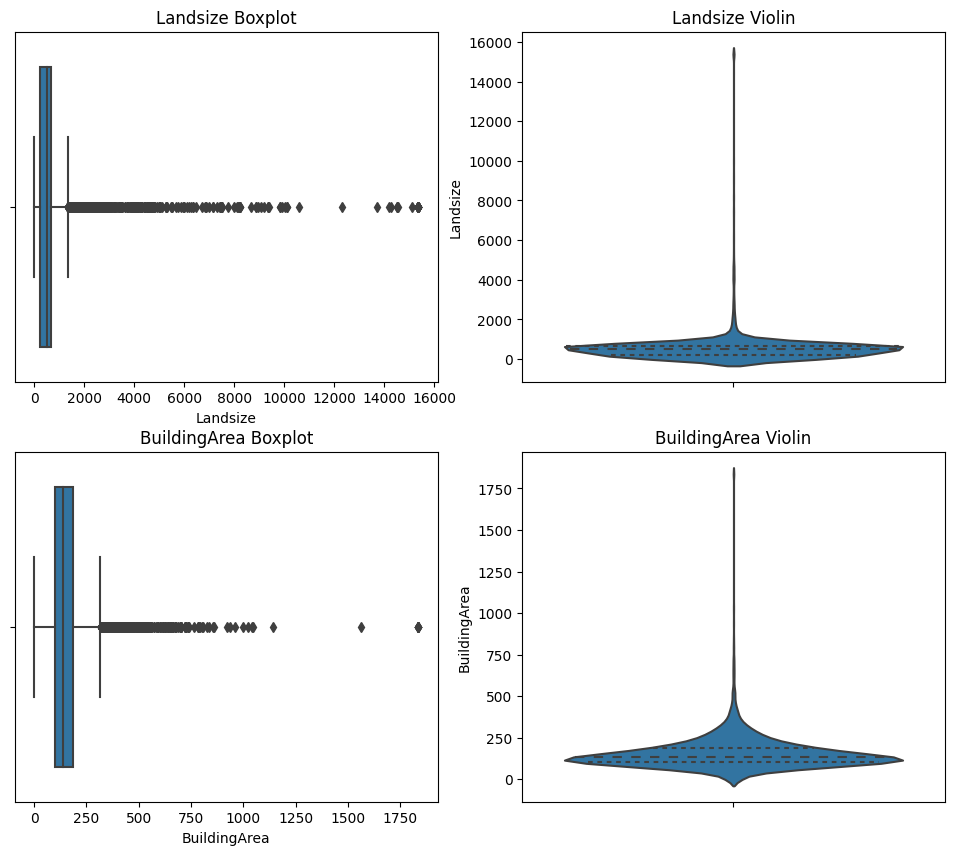

In [18]:
plot_outliers(df_copy,cols_outlier)

In [19]:
# Find and remove the missing values on the dataset
# You can observe from the dataset that the missing values are in the bathroom and car variables.
# We expect the missing values in the dataset to be filled using the mode method. You can use the code below for this.
"""
  HINT:
    for column in categorical_columns:
      data[column] = data[column].fillna(data[column].mode().iloc[0])
"""

print(pd.concat([df_copy.isnull().sum(), df_copy.isnull().sum()/len(df_copy)*100],
                 keys=['Number of Missing Values', 'Ratio of Missing Values'],
                 axis=1))

               Number of Missing Values  Ratio of Missing Values
Suburb                                0                 0.000000
Address                               0                 0.000000
Rooms                                 0                 0.000000
Type                                  0                 0.000000
Price                              7609                21.829814
Method                                0                 0.000000
SellerG                               0                 0.000000
Date                                  0                 0.000000
Distance                              1                 0.002869
Postcode                              1                 0.002869
Bedroom2                           8217                23.574134
Bathroom                           8226                23.599954
Car                                8728                25.040165
Landsize                          11810                33.882258
BuildingArea             

In [20]:
categorical_missing_columns = ['Bedroom2','Bathroom','Car', 'YearBuilt']
cols_drop_with_missing_values = ['Distance', 'Postcode','CouncilArea','Lattitude','Longtitude', 'Regionname',  'Propertycount', 'Distance']
cols_fill_with_mean_value = ['Landsize','BuildingArea','Price']

In [21]:
# the missing values in the dataset to be filled using the mode method
for col in categorical_missing_columns:
  df_copy[col] = df_copy[col].fillna(df_copy[col].mode().iloc[0])

In [22]:
# Drop rows with missing values
df_copy.dropna(subset=cols_drop_with_missing_values, inplace=True)

In [23]:
# Fill missing column value with mean value
for col in cols_fill_with_mean_value:
  mean =  df_copy[col].mean()
  df_copy[col] = df_copy[col].fillna(mean)

In [24]:
print(pd.concat([df_copy.isnull().sum(), df_copy.isnull().sum()/len(df_copy)*100],
                 keys=['Number of Missing Values', 'Ratio of Missing Values'],
                 axis=1))

               Number of Missing Values  Ratio of Missing Values
Suburb                                0                      0.0
Address                               0                      0.0
Rooms                                 0                      0.0
Type                                  0                      0.0
Price                                 0                      0.0
Method                                0                      0.0
SellerG                               0                      0.0
Date                                  0                      0.0
Distance                              0                      0.0
Postcode                              0                      0.0
Bedroom2                              0                      0.0
Bathroom                              0                      0.0
Car                                   0                      0.0
Landsize                              0                      0.0
BuildingArea             

In [26]:
# Find the shape, number of columns and size of the dataset
print(f'Shape     : {df_copy.shape}\n'
      f'Size      : {df_copy.size}\n'
      f'Dimension : {df_copy.ndim}')

Shape     : (26880, 21)
Size      : 564480
Dimension : 2
